## 3.2 Data preparation

In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
!wget $data -O data-week-3.csv

--2025-08-28 21:44:56--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.02s   

2025-08-28 21:44:56 (39.3 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [5]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [6]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [7]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

## 4.2 Accuracy and dummy model

In [9]:
## Pruebo el modelo para otros puntos de corte

thresholds = np.linspace(0,1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [10]:
scores = []
 
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


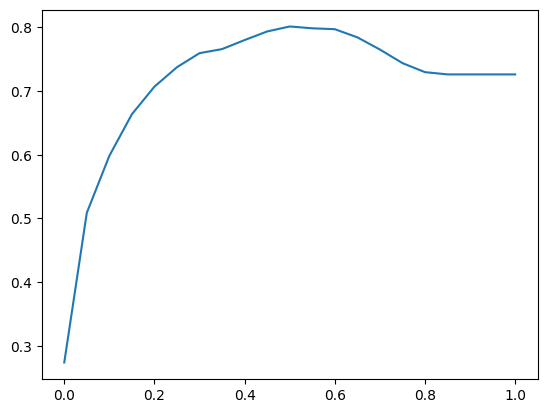

In [11]:
plt.plot(thresholds, scores)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
thresholds = np.linspace(0, 1, 21)
scores = []
 
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [14]:
from collections import Counter

In [15]:
Counter(y_pred >1)

Counter({np.False_: 1409})

In [16]:
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})

In [17]:
y_val.mean()

np.float64(0.2739531582682754)

In [18]:
1-y_val.mean()

np.float64(0.7260468417317246)

## 4.3 Confusion table

In [19]:
actual_positive = (y_val ==1)

In [20]:
actual_negative = (y_val == 0)

In [21]:
actual_positive

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [22]:
t = .5
predict_positive = y_pred >= t
predict_negative = y_pred < t

In [23]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [24]:
tp, tn, fp,fn 

(np.int64(214), np.int64(915), np.int64(108), np.int64(172))

In [25]:
tp + tn + fp + fn 

np.int64(1409)

In [26]:
confusion_matrix  = np.array([
    [tn, fp],
    [fp, tp]
])
confusion_matrix

array([[915, 108],
       [108, 214]])

In [27]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.68, 0.08],
       [0.08, 0.16]])

## 4.4 Precision and Recall

In [28]:
(tp + tn )/ (tp + tn + fp + fn )

np.float64(0.801277501774308)

In [29]:
precision = tp /(tp + fp)
precision

np.float64(0.6645962732919255)

In [30]:
(tp + fp)

np.int64(322)

In [31]:
recall = tp /(tp + fn)
recall

np.float64(0.5544041450777202)

## 4.5 ROC Curves

In [32]:
fpr = fp/(tn+fp)
fpr
## Esto sería cuántos digo que son 1 y en realidad son 0. O sea de todos los que NO cumplen la condición, cuántos dije que sí la cumplian.
## Intento Minimizar este valor

np.float64(0.10557184750733138)

In [33]:
tpr = tp/(tp+fn)
tpr
## Esto es cuántos dije que sí eran del total real que sí cumplen la condición.
## A cuántos de los que sí cumplen, le acerté. Intento Maximizar este valor.

np.float64(0.5544041450777202)

In [34]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_val ==1)
    actual_negative = (y_val == 0)

    predict_positive = y_pred >= t
    predict_negative = y_pred < t

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    fpr = fp/(tn+fp)
    tpr = tp/(tp+fn)

    scores.append((t, tp,tn,fp,fn,fpr,tpr))
    

In [35]:
columns = ['umbral','tp','tn','fp','fn','fpr','tpr']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores

,umbral,tp,tn,fp,fn,fpr,tpr
0,0.00,386,0,1023,0,1.000000,1.000000
1,0.01,385,120,903,1,0.882698,0.997409
2,0.02,384,211,812,2,0.793744,0.994819
3,0.03,382,270,753,4,0.736070,0.989637
4,0.04,380,315,708,6,0.692082,0.984456
...,...,...,...,...,...,...,...
96,0.96,0,1023,0,386,0.000000,0.000000
97,0.97,0,1023,0,386,0.000000,0.000000
98,0.98,0,1023,0,386,0.000000,0.000000
99,0.99,0,1023,0,386,0.000000,0.000000


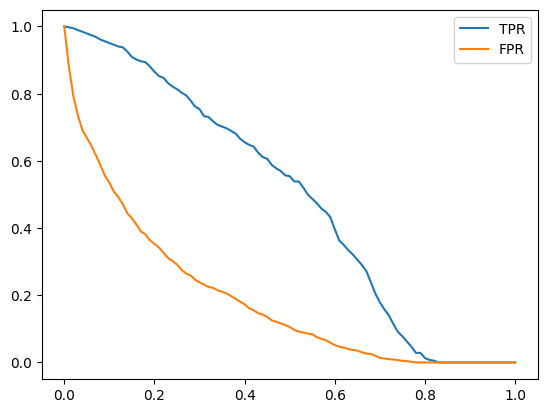

In [36]:
plt.plot(df_scores.umbral, df_scores.tpr, label='TPR')
plt.plot(df_scores.umbral, df_scores.fpr, label='FPR')
plt.legend()

### Random model

In [37]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))

In [38]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [39]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = y_pred >= t
        predict_negative = y_pred < t
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        fpr = fp/(tn+fp)
        tpr = tp/(tp+fn)

        scores.append((t, tp,tn,fp,fn,fpr,tpr))

    columns = ['umbral','tp','tn','fp','fn','fpr','tpr']
    df_scores = pd.DataFrame(scores,columns=columns)
    df_scores

    return df_scores

In [40]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand

,umbral,tp,tn,fp,fn,fpr,tpr
0,0.00,386,0,1023,0,1.000000,1.000000
1,0.01,382,10,1013,4,0.990225,0.989637
2,0.02,379,30,993,7,0.970674,0.981865
3,0.03,375,44,979,11,0.956989,0.971503
4,0.04,372,54,969,14,0.947214,0.963731
...,...,...,...,...,...,...,...
96,0.96,14,982,41,372,0.040078,0.036269
97,0.97,11,987,36,375,0.035191,0.028497
98,0.98,8,1004,19,378,0.018573,0.020725
99,0.99,6,1016,7,380,0.006843,0.015544


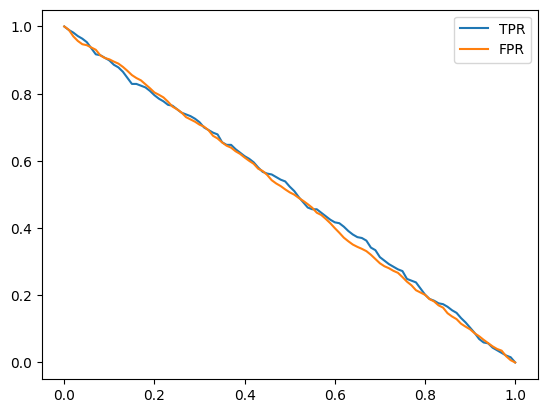

In [41]:
plt.plot(df_rand.umbral, df_rand.tpr, label='TPR')
plt.plot(df_rand.umbral, df_rand.fpr, label='FPR')
plt.legend()

### Modelo Ideal

In [42]:
## Creo un modelo en el que asumo que siempre acierta

y_ideal = np.repeat([0,1],[(tn+fp),(tp+fn)])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [43]:
y_ideal_pred = np.linspace(0,1, len(y_val))

In [44]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [45]:
df_ideal= tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal

,umbral,tp,tn,fp,fn,fpr,tpr
0,0.00,386,0,1023,0,1.000000,1.000000
1,0.01,386,15,1008,0,0.985337,1.000000
2,0.02,386,29,994,0,0.971652,1.000000
3,0.03,386,43,980,0,0.957967,1.000000
4,0.04,386,57,966,0,0.944282,1.000000
...,...,...,...,...,...,...,...
96,0.96,57,1023,0,329,0.000000,0.147668
97,0.97,43,1023,0,343,0.000000,0.111399
98,0.98,29,1023,0,357,0.000000,0.075130
99,0.99,15,1023,0,371,0.000000,0.038860


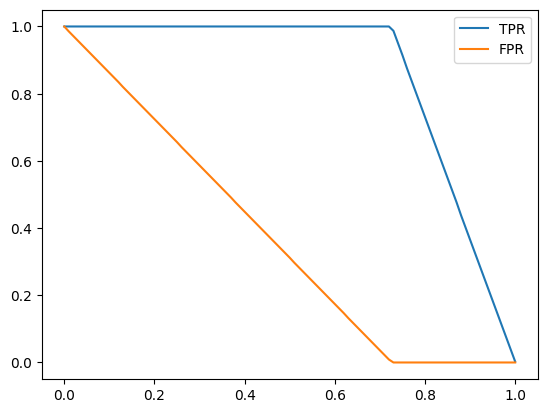

In [46]:
plt.plot(df_ideal.umbral, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.umbral, df_ideal.fpr, label='FPR')
plt.legend()

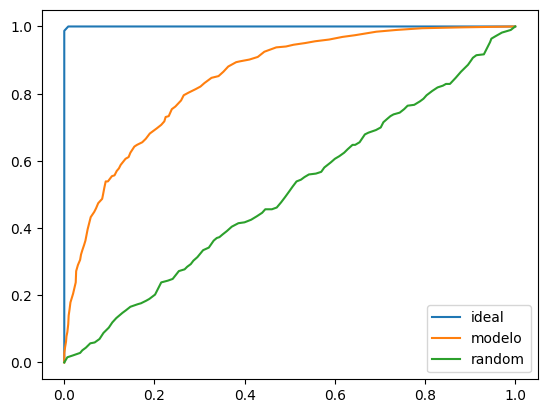

In [47]:
### Dibujando "todos"

plt.plot(df_ideal.fpr,df_ideal.tpr, label='ideal')
plt.plot(df_scores.fpr,df_scores.tpr, label='modelo')
plt.plot(df_rand.fpr,df_rand.tpr, label='random')

plt.legend()

## 4.6 ROC AUC

In [48]:
from sklearn.metrics import auc

In [49]:
auc(df_scores.fpr,df_scores.tpr)

0.8443696534119398

In [50]:
auc(df_ideal.fpr,df_ideal.tpr)

0.9999430203759136

In [51]:
## La medida de auc indica la probabilidad de que elegiendo un caso de manera aleatoria este sea un positivo en lugar de un negativo.
## En otras palabras: El área bajo la curva ROC (AUC) representa la probabilidad de que el modelo, 
## si se le da un ejemplo positivo y negativo elegido al azar, clasifique el positivo más alto que el negativo

negativo = y_pred[y_val == 0]
positivo = y_pred[y_val == 1]

In [52]:
negativo.shape

(1023,)

In [53]:
positivo.shape

(386,)

In [54]:
import random

In [55]:
n = 1000000
succes = 0

for i in range(n):
    positive_index = random.randint(0,len(positivo)-1)
    negative_index = random.randint(0,len(negativo)-1)

    if positivo[positive_index] > negativo  [negative_index]:
        succes = succes + 1

succes/n    

0.844942

## 4.7 Cross-Validation

K-Fold Cross-Validation is a method for assessing the same model on various subsets of our dataset

In [93]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
 
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
 
    model = LogisticRegression(C=C, max_iter = 1000)
    model.fit(X_train, y_train)
 
    return dv, model

In [94]:
dv, model = train(df_train, y_train, C=10)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
def predict(df, dv, model):
     dicts = df[categorical + numerical].to_dict(orient='records')
 
     X = dv.fit_transform(dicts)
     y_pred = model.predict_proba(X)[:,1]
 
     return y_pred

In [61]:
y_pred = predict(df_val, dv, model)
y_pred

array([0.00786347, 0.20992803, 0.2237105 , ..., 0.15014869, 0.77668113,
       0.81035774], shape=(1409,))

In [65]:
from sklearn.model_selection import KFold

In [67]:
kfold = KFold(n_splits=10, shuffle=True, random_state =1)

In [70]:
train_index, val_index = next(kfold.split(df_full_train))

In [71]:
len(train_index)

5070

In [72]:
len(val_index)

564

In [75]:
len(df_full_train) == len(val_index) + len(train_index)

True

In [80]:
from sklearn.metrics import roc_auc_score

In [85]:
!pip install tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [87]:
from tqdm.auto import tqdm

In [100]:
## Entonces, iteramos:

n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):

    scores = []

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state =1)
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv,model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
                    
    print('C=%s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))   

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001, 0.825 +- 0.009


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.01, 0.840 +- 0.008


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.1, 0.842 +- 0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.5, 0.842 +- 0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=1, 0.842 +- 0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=5, 0.842 +- 0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=10, 0.842 +- 0.007


In [103]:
dv,model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)
    
auc = roc_auc_score(y_test, y_pred)
auc

0.8584032088573997